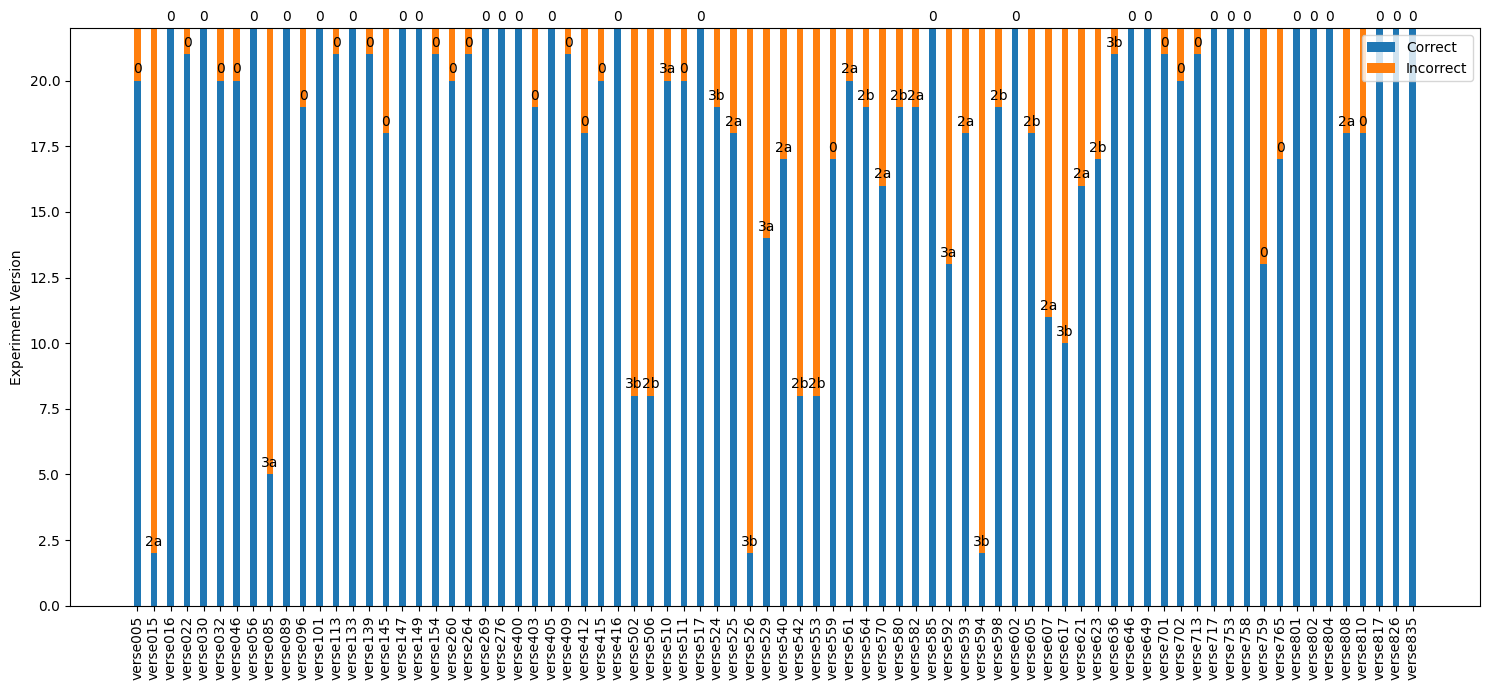

In [1]:
import matplotlib.pyplot as plt
import json

# Open the JSON file and load the data
with open('/data1/practical-sose23/castellvi/team_repo/3D-Castellvi-Prediction/experiments/baseline_models/densenet/eval_results.json', 'r') as f:
    data = json.load(f)

# Extract the subject names, correct, incorrect predictions and actual labels
subject_names = [item['subject_name'] for item in data]
correct_predictions = [item.get('correct', 0) for item in data]
incorrect_predictions = [item.get('incorrect', 0) for item in data]
actual_labels = [item.get('actual_label', '') for item in data]
predicted_labels = [item.get('predicted_label', '') for item in data]

# Get the x locations for the groups
x = range(len(subject_names))

# Plot the correct and incorrect predictions as grouped bars
fig, ax = plt.subplots(figsize=(15,7))

rects1 = ax.bar(x, correct_predictions, width=0.4, label='Correct')
rects2 = ax.bar(x, incorrect_predictions, width=0.4, bottom=correct_predictions, label='Incorrect')

# Add labels, title, and legend
ax.set_ylabel('Experiment Version')
ax.set_xticks(x)
ax.set_xticklabels(subject_names, rotation='vertical')
ax.legend()

# Annotate the bars with the actual labels for correct predictions
for i, rect in enumerate(rects1):
    height = rect.get_height()
    ax.annotate('{}'.format(actual_labels[i]),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')


# Annotate the bars with the predicted labels for incorrect predictions
for i, rect in enumerate(rects2):
    height = rect.get_height() + correct_predictions[i]  # We add the correct_predictions to the height because incorrect bars are stacked on top of correct bars
    ax.annotate('{}'.format(predicted_labels[i]),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom')
    
# Show the plot
plt.tight_layout()
plt.show()


In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
data_path = '/data1/practical-sose23/castellvi/team_repo/3D-Castellvi-Prediction/experiments/baseline_models/densenet/eval_results.json'
# Assuming your JSON data is saved in a file called 'data.json'
with open(data_path) as f:
    data = json.load(f)


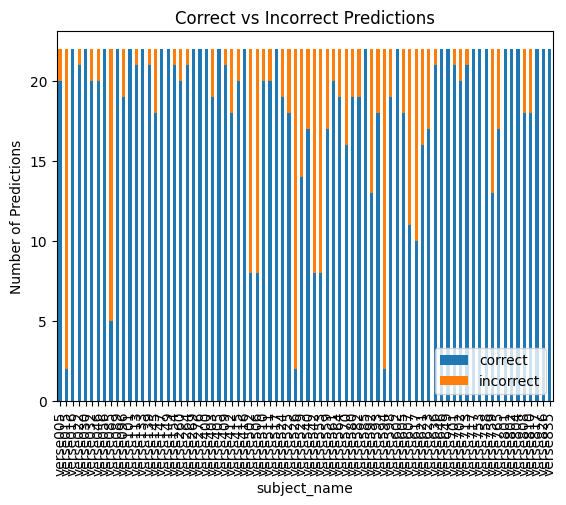

In [3]:
# Create a DataFrame from the JSON data
df = pd.json_normalize(data)

# Set the index to the subject name
df.set_index('subject_name', inplace=True)

# Plot the bar chart
df[['correct', 'incorrect']].plot(kind='bar', stacked=True)
plt.ylabel('Number of Predictions')
plt.title('Correct vs Incorrect Predictions')
plt.show()


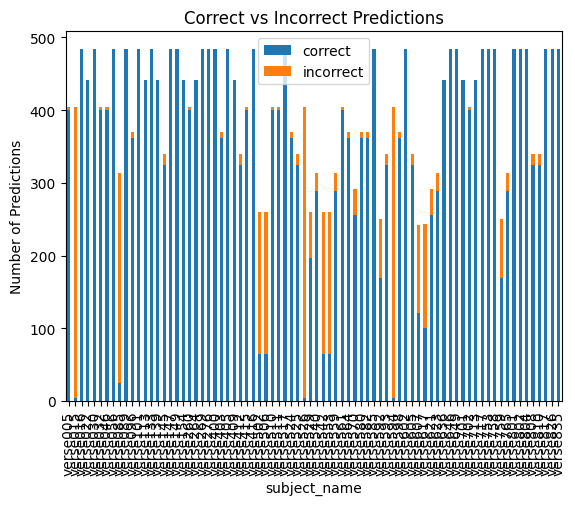

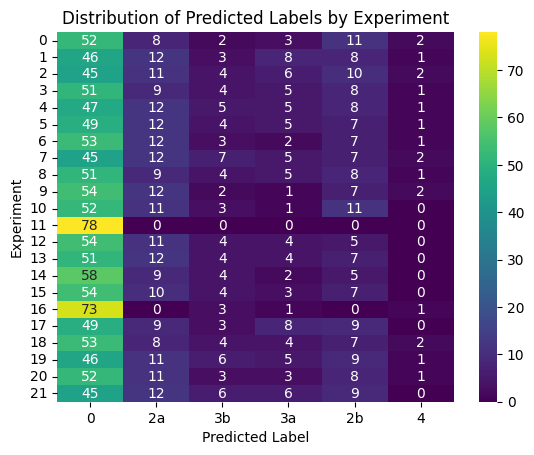

In [4]:
# Assuming your JSON data is saved in a file called 'data.json'
with open(data_path) as f:
    data = json.load(f)

# Flatten the data if 'predicted_labels' is a nested dictionary
data_flattened = []
for subject in data:
    for experiment, label in subject['predicted_labels'].items():
        data_flattened.append({
            'subject_name': subject['subject_name'],
            'experiment': experiment,
            'actual_label' : subject['actual_label'],
            'predicted_label': label,
            'correct': subject['correct'] if label == subject['actual_label'] else 0,
            'incorrect': subject['incorrect'] if label != subject['actual_label'] else 0
        })

# Create a DataFrame from the flattened data
df = pd.DataFrame(data_flattened)

# Set the index to the subject name
df.set_index('subject_name', inplace=True)

# Plot the bar chart for correct and incorrect predictions
df.groupby('subject_name')[['correct', 'incorrect']].sum().plot(kind='bar', stacked=True)
plt.ylabel('Number of Predictions')
plt.title('Correct vs Incorrect Predictions')
plt.show()

# Create an empty DataFrame for the heatmap data
heatmap_data = pd.DataFrame(0, index=np.arange(len(df['experiment'].unique())), columns=df['predicted_label'].unique())

# Fill in the DataFrame with the counts of each label for each experiment
for i, row in df.iterrows():
    heatmap_data.loc[int(row['experiment'].split('_')[1]), row['predicted_label']] += 1

# Plot the heatmap
sns.heatmap(heatmap_data, annot=True, cmap='viridis')
plt.title('Distribution of Predicted Labels by Experiment')
plt.ylabel('Experiment')
plt.xlabel('Predicted Label')
plt.show()


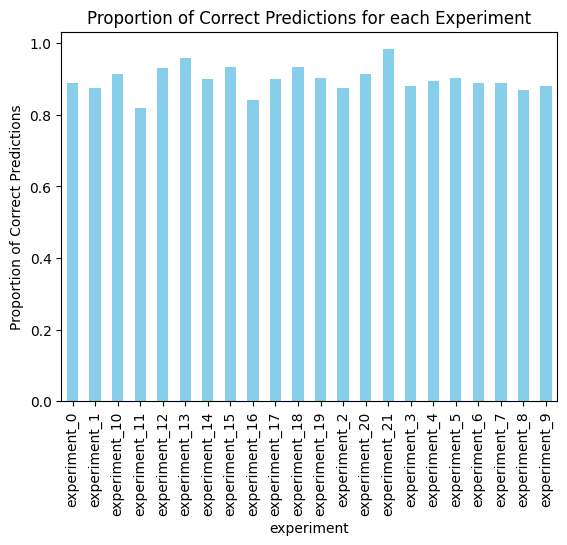

In [5]:
# Group by experiment and sum the correct and incorrect predictions
experiment_results = df.groupby('experiment')[['correct', 'incorrect']].sum()

# Calculate the proportion of correct predictions for each experiment
experiment_results['proportion_correct'] = experiment_results['correct'] / (experiment_results['correct'] + experiment_results['incorrect'])

# Plot the proportion of correct predictions for each experiment
experiment_results['proportion_correct'].plot(kind='bar', color='skyblue')
plt.ylabel('Proportion of Correct Predictions')
plt.title('Proportion of Correct Predictions for each Experiment')
plt.show()

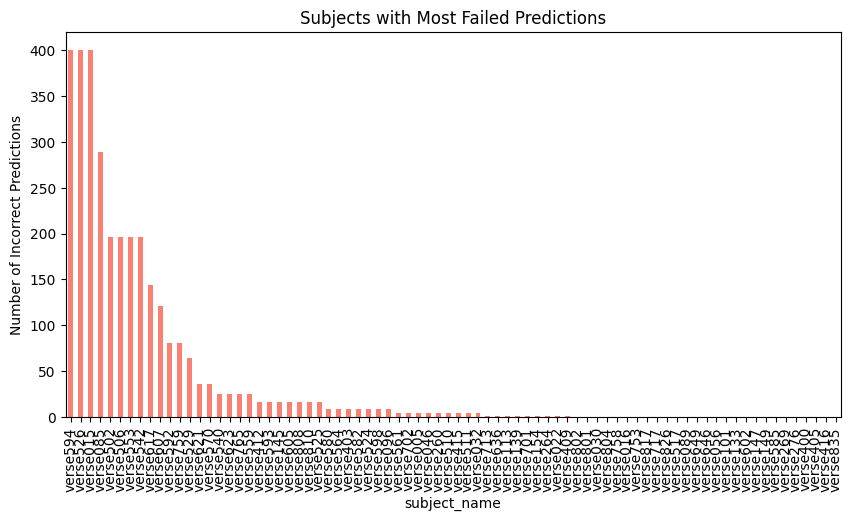

In [6]:
# Group by subject and sum the incorrect predictions
subject_results = df.groupby('subject_name')['incorrect'].sum()

# Sort the results in descending order
subject_results = subject_results.sort_values(ascending=False)

# Plot the subjects with the most failed predictions
subject_results.plot(kind='bar', color='salmon', figsize=(10,5))
plt.ylabel('Number of Incorrect Predictions')
plt.title('Subjects with Most Failed Predictions')
plt.show()


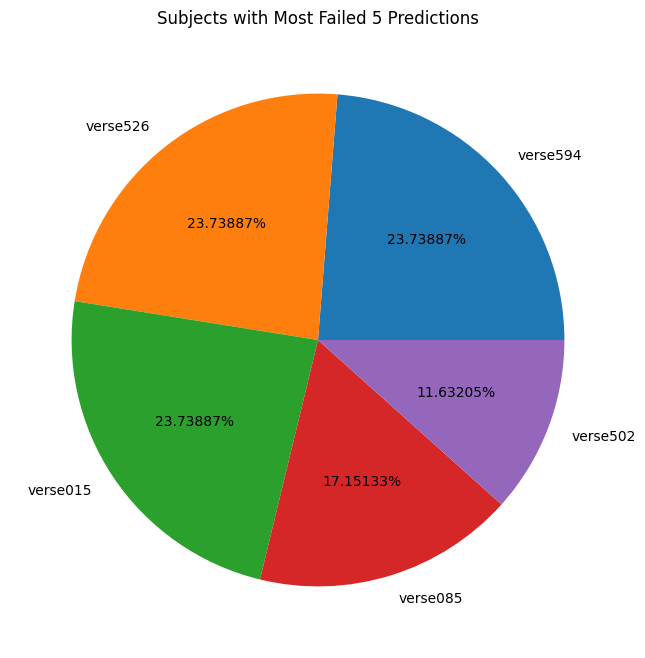

In [7]:
# Group by subject and sum the incorrect predictions
subject_results = df.groupby('subject_name')['incorrect'].sum()

# Sort the results in descending order
subject_results = subject_results.sort_values(ascending=False)[:5]

# Generate the pie chart
plt.figure(figsize=(10,8))  # Adjust the figure size as needed
plt.pie(subject_results, labels=subject_results.index, autopct='%1.5f%%')
plt.title('Subjects with Most Failed 5 Predictions')
plt.show()

              incorrect actual_label
subject_name                        
verse594            400           3b
verse526            400           3b
verse015            400           2a
verse085            289           3a
verse502            196           3b
...                 ...          ...
verse276              0            0
verse400              0            0
verse405              0            0
verse416              0            0
verse835              0            0

[78 rows x 2 columns]


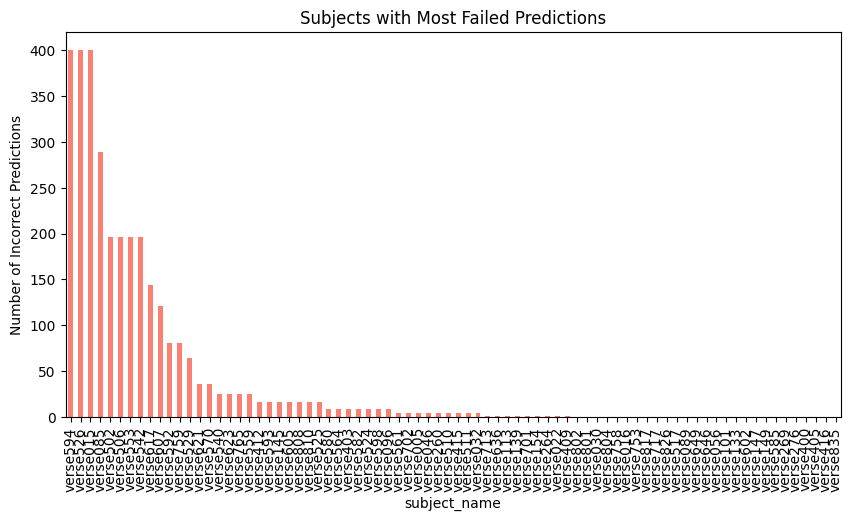

In [8]:
# Group by subject and sum the incorrect predictions and list actual labels
subject_results = df.groupby('subject_name').agg({'incorrect': 'sum', 'actual_label': 'first'})

# Sort the results in descending order based on incorrect predictions
subject_results = subject_results.sort_values(by='incorrect', ascending=False)

# Print the subject results
print(subject_results)

# Plot the subjects with the most failed predictions
subject_results['incorrect'].plot(kind='bar', color='salmon', figsize=(10,5))
plt.ylabel('Number of Incorrect Predictions')
plt.title('Subjects with Most Failed Predictions')
plt.show()


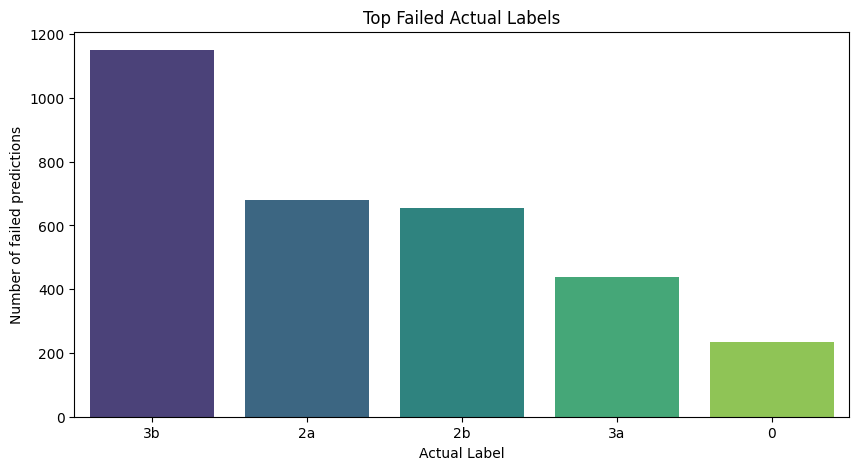

In [9]:
# Group by actual_label and sum the incorrect predictions
label_results = df.groupby('actual_label').agg({'incorrect': 'sum'})

# Sort the results in descending order based on incorrect predictions
label_results = label_results.sort_values(by='incorrect', ascending=False)

# Visualize the results
plt.figure(figsize=(10, 5))
bar = sns.barplot(x=label_results.index, y=label_results['incorrect'], palette='viridis')

plt.title('Top Failed Actual Labels')
plt.xlabel('Actual Label')
plt.ylabel('Number of failed predictions')
plt.show()


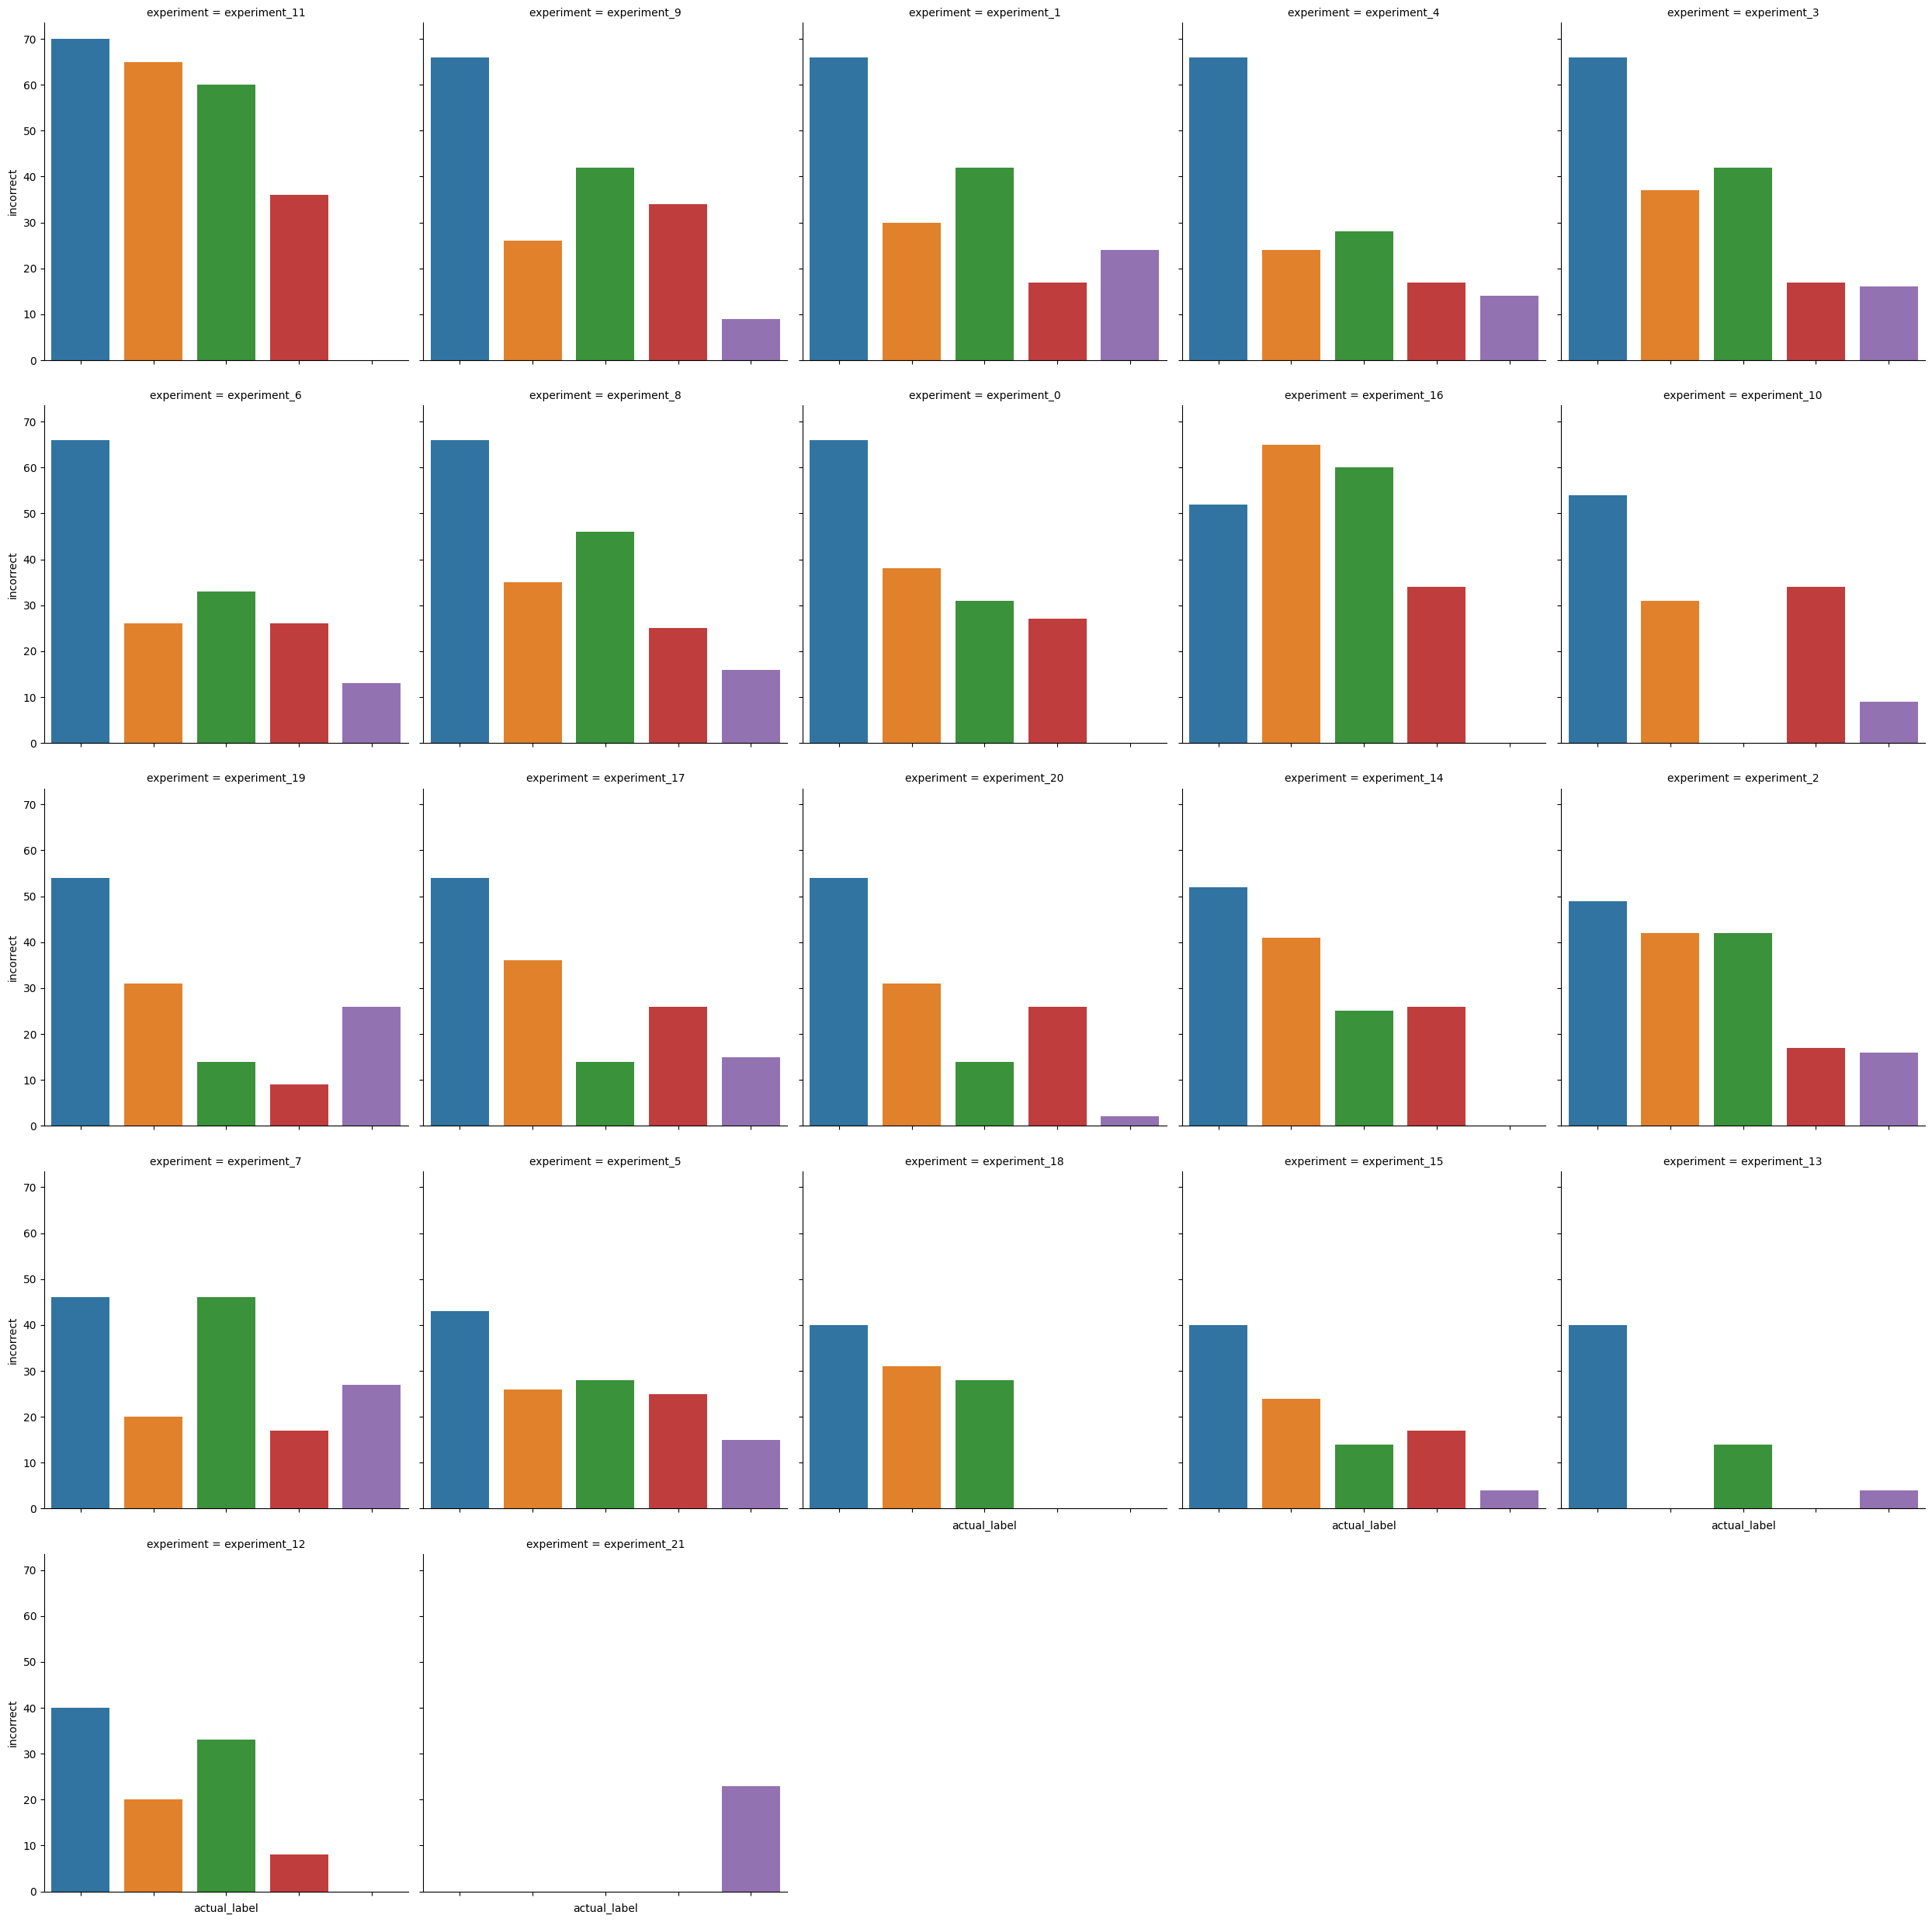

In [10]:

# Group by experiment_id and actual_label, then sum the incorrect predictions
experiment_label_results = df.groupby(['experiment', 'actual_label']).agg({'incorrect': 'sum'})

# Reset the index so that we can manipulate the experiment_id and actual_label data
experiment_label_results.reset_index(inplace=True)

# Sort the results in descending order based on incorrect predictions
experiment_label_results.sort_values(by='incorrect', ascending=False, inplace=True)

# Use seaborn's catplot to create a FacetGrid, plotting each experiment separately
g = sns.catplot(
    data=experiment_label_results, kind="bar",
    x="actual_label", y="incorrect", col="experiment",
    col_wrap=5, height=5, aspect=1
)

# Rotate x-axis labels for readability
g.set_xticklabels(rotation=0)

# Show the plot
plt.show()


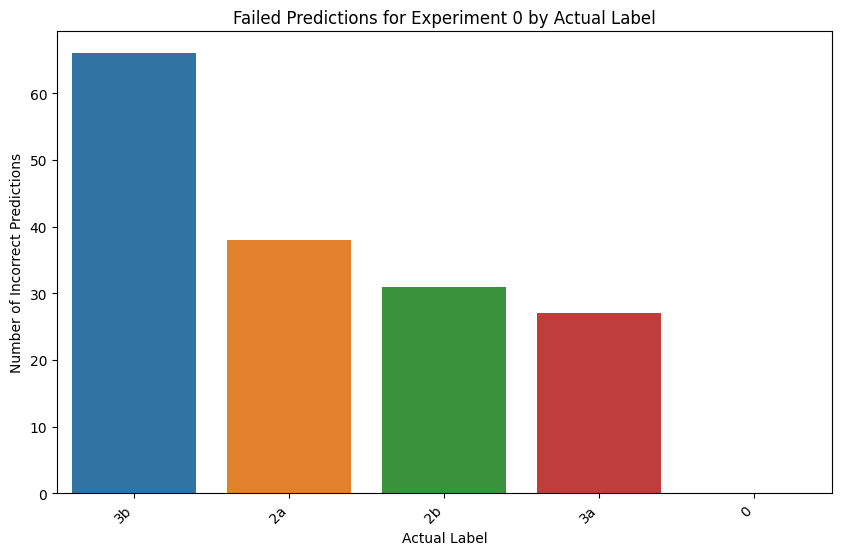

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the dataframe to only include data for experiment_0
experiment_0_results = experiment_label_results[experiment_label_results['experiment'] == 'experiment_0']

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='actual_label', y='incorrect', data=experiment_0_results)

# Rotate x-axis labels for readability
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set title and labels for the plot
plt.title('Failed Predictions for Experiment 0 by Actual Label')
plt.xlabel('Actual Label')
plt.ylabel('Number of Incorrect Predictions')

# Show the plot
plt.show()


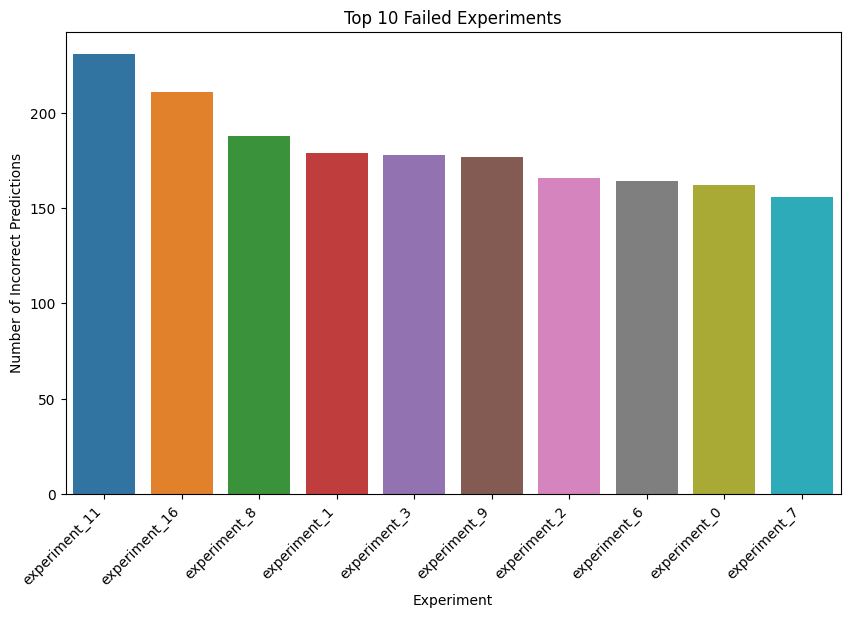

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by experiment and sum the incorrect predictions
experiment_results = df.groupby('experiment').agg({'incorrect': 'sum'})

# Sort the results in descending order based on incorrect predictions
experiment_results = experiment_results.sort_values(by='incorrect', ascending=False)

# Let's consider top 10 failed experiments for visualization
top_failed_experiments = experiment_results.head(10)

# Reset the index so that we can manipulate the experiment data
top_failed_experiments.reset_index(inplace=True)

# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
bar = sns.barplot(x='experiment', y='incorrect', data=top_failed_experiments)

# Rotate x-axis labels for readability
bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')

# Set title and labels for the plot
plt.title('Top 10 Failed Experiments')
plt.xlabel('Experiment')
plt.ylabel('Number of Incorrect Predictions')

# Show the plot
plt.show()


In [13]:
masterlist = pd.read_excel('/data1/practical-sose23/castellvi/team_repo/3D-Castellvi-Prediction/src/dataset/VerSe_masterlist_V4.xlsx')
# extract only the rows with a split value 'test' or 'val' 
masterlist = masterlist[masterlist['Split'].isin(['test', 'val'])]


In [14]:
masterlist

,Unnamed: 0,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Flip
2,2,5,sub-verse005,0,NaN,True,L5,test,1
3,3,5,sub-verse005,0,NaN,True,L5,test,0
16,16,15,sub-verse015,2a,L,True,L5,val,0
17,17,15,sub-verse015,2a,R,True,L5,val,1
18,18,16,sub-verse016,0,NaN,True,L5,val,0
...,...,...,...,...,...,...,...,...,...
535,535,817,sub-verse817,0,NaN,True,L5,val,0
548,548,826,sub-verse826,0,NaN,True,L5,val,1
549,549,826,sub-verse826,0,NaN,True,L5,val,0
552,552,835,sub-verse835,0,NaN,True,L5,test,0


In [15]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
with open(data_path, 'r') as f:
    data = json.load(f)

# Transform the data into a DataFrame
df = pd.json_normalize(data)



In [16]:
df.columns

Index(['subject_name', 'actual_label', 'correct', 'incorrect',
       'predicted_labels.experiment_0', 'predicted_labels.experiment_1',
       'predicted_labels.experiment_2', 'predicted_labels.experiment_3',
       'predicted_labels.experiment_4', 'predicted_labels.experiment_5',
       'predicted_labels.experiment_6', 'predicted_labels.experiment_7',
       'predicted_labels.experiment_8', 'predicted_labels.experiment_9',
       'predicted_labels.experiment_10', 'predicted_labels.experiment_11',
       'predicted_labels.experiment_17', 'predicted_labels.experiment_18',
       'predicted_labels.experiment_19', 'predicted_labels.experiment_20',
       'predicted_labels.experiment_12', 'predicted_labels.experiment_13',
       'predicted_labels.experiment_14', 'predicted_labels.experiment_15',
       'predicted_labels.experiment_16', 'predicted_labels.experiment_21',
       'f1_scores.experiment_0', 'f1_scores.experiment_1',
       'f1_scores.experiment_2', 'f1_scores.experiment_3',
    

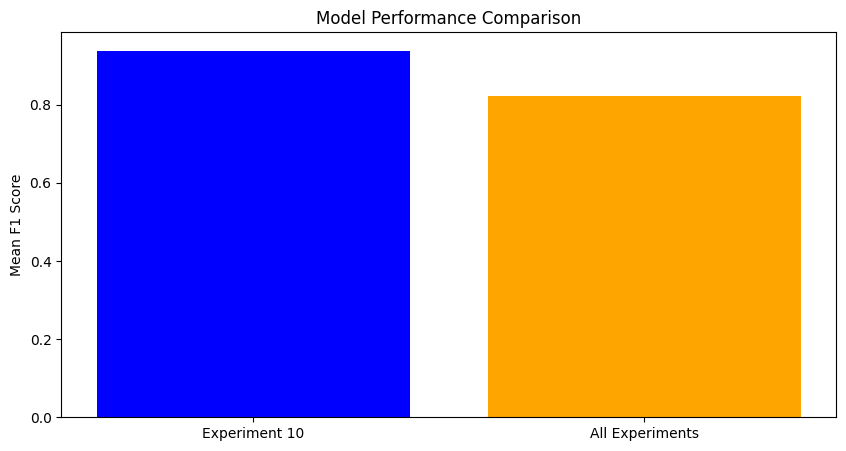

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Extract F1 scores for experiment 10 and for all experiments
experiment_10_scores = df['f1_scores.experiment_21']
mean_experiment_scores = df[[col for col in df.columns if 'f1_scores.' in col]].mean(axis=1)

# Calculate the mean F1 score for experiment 10 and all experiments
mean_score_experiment_10 = np.mean(experiment_10_scores)
mean_score_all_experiments = np.mean(mean_experiment_scores)

# Plot a bar chart comparing these mean F1 scores
plt.figure(figsize=(10, 5))
plt.bar(['Experiment 10', 'All Experiments'], [mean_score_experiment_10, mean_score_all_experiments], color=['blue', 'orange'])
plt.ylabel('Mean F1 Score')
plt.title('Model Performance Comparison')
plt.show()


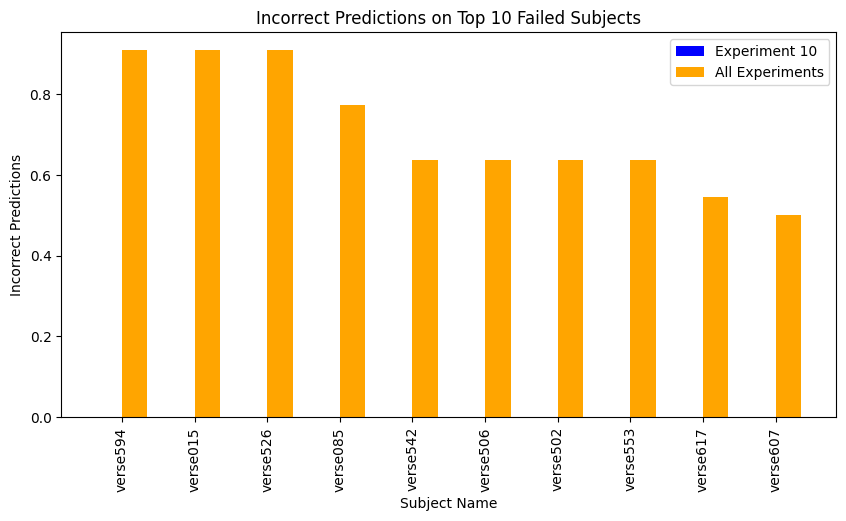

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Compute number of incorrect predictions per subject
incorrect_results = df.sort_values('incorrect', ascending=False).head(10)

# Calculate incorrect predictions for Experiment 10 and average across all experiments
incorrect_experiment_10 = incorrect_results['predicted_labels.experiment_21'] != incorrect_results['actual_label']
incorrect_avg = incorrect_results[[col for col in df.columns if 'predicted_labels.' in col]].ne(incorrect_results['actual_label'], axis=0).mean(axis=1)

# Plot a bar chart comparing these incorrect predictions
plt.figure(figsize=(10, 5))
width = 0.35  # Width of the bars

# Position of bars
r1 = np.arange(len(incorrect_experiment_10))
r2 = [x + width for x in r1]

plt.bar(r1, incorrect_experiment_10, width, color='blue', label='Experiment 10')
plt.bar(r2, incorrect_avg, width, color='orange', label='All Experiments')

plt.xlabel('Subject Name')
plt.xticks([r + width / 2 for r in range(len(incorrect_experiment_10))], incorrect_results['subject_name'], rotation=90)
plt.ylabel('Incorrect Predictions')
plt.title('Incorrect Predictions on Top 10 Failed Subjects')
plt.legend()
plt.show()


In [23]:
incorrect_experiment_10

51    False
1     False
37    False
8     False
40    False
31    False
30    False
41    False
56    False
55    False
dtype: bool